# imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys  
sys.path.insert(0, '/home/tofi/Documents/code/tofi_ml/Linear models/Logistic regression')
from LogisticRegression import LogisticRegression as lr

# reading data

In [2]:
data = pd.read_csv("data/ds1_train.csv")
data.describe()

,x_1,x_2,y
count,800.000000,800.000000,800.000000
mean,3.515825,92.748239,0.500000
std,1.117077,113.841915,0.500313
min,-0.517464,1.403270,0.000000
25%,2.792988,26.244045,0.000000
50%,3.462076,55.325152,0.500000
75%,4.297189,114.647613,1.000000
max,7.017044,922.403554,1.000000


In [3]:
x_train = data[["x_1", "x_2"]]
x_train = np.array(x_train)

# mu = np.mean(x_train, axis=0)
# # x_train -= mu
# print(mu)
# sg = np.std(x_train, axis=0)
# print(sg)
# x_train = (x_train - mu) / sg

# x_train

[ 3.51582526 92.74823917]
[  1.11637879 113.77074186]


In [4]:
y_train = np.array(data.y)

In [5]:
eval_data = pd.read_csv("data/ds1_valid.csv")
x_eval = np.array(eval_data[["x_1", "x_2"]])
y_eval = np.array(eval_data.y)

# visualizing data

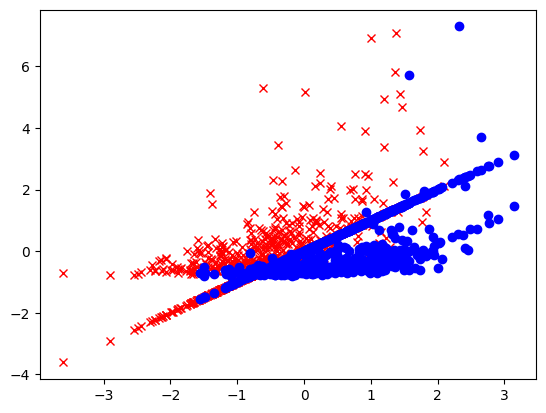

In [6]:
# seperate classes into two arrays
class0_x = x_train[y_train== 0]
class1_x = x_train[y_train== 1]

# plot both classes
plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

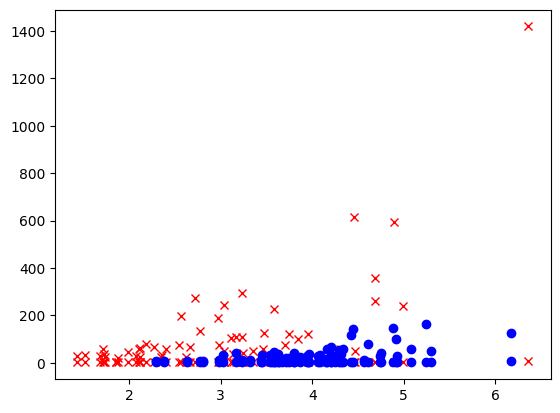

In [7]:
class0_x = x_eval[y_eval == 0]
class1_x = x_eval[y_eval == 1]

plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

# training model

In [8]:
model = lr()

In [9]:
# train model with doffrent lr and iter_limit to find best fit
model.train(x_train, y_train, lr=0.001, iter_limit=100000)

In [10]:
model.weights

array([ 2.48820755, -2.91513846])

In [11]:
model.bias

-0.23650649448130373

In [12]:
# predict on eval data
pred = model.predict(x_eval)

# calculate accuracy
result = (pred == y_eval)
result.sum() / pred.size

/home/tofi/Documents/code/tofi_ml/Linear Models/Logistic regression/LogisticRegression.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.5

# Visualizing model preformance

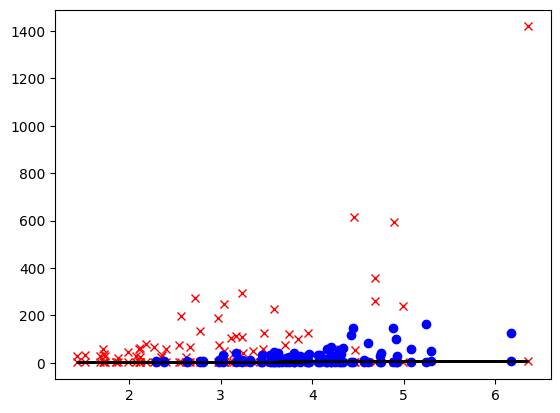

In [13]:
# plot eval data
class0_x = x_eval[y_eval == 0]
class1_x = x_eval[y_eval == 1]
plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

# plot decision boundary
dec_boundary = -(model.bias + model.weights[0]*x_eval[:,0]) / model.weights[1]
plt.plot(x_eval[:,0], dec_boundary, "black")

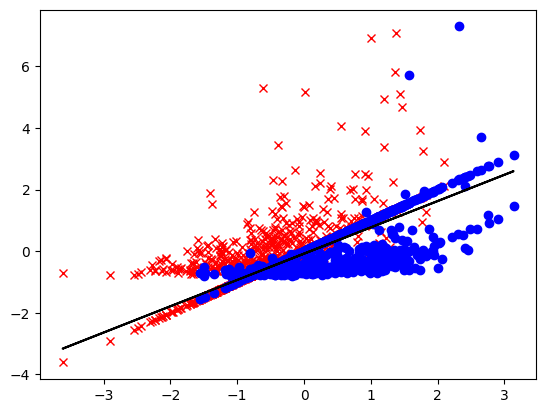

In [14]:
# plot train data
class0_x = x_train[y_train == 0]
class1_x = x_train[y_train == 1]
plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

# plot decision boundary
dec_boundary = -(model.bias + model.weights[0]*x_train[:,0]) / model.weights[1]
plt.plot(x_train[:,0], dec_boundary, "black")

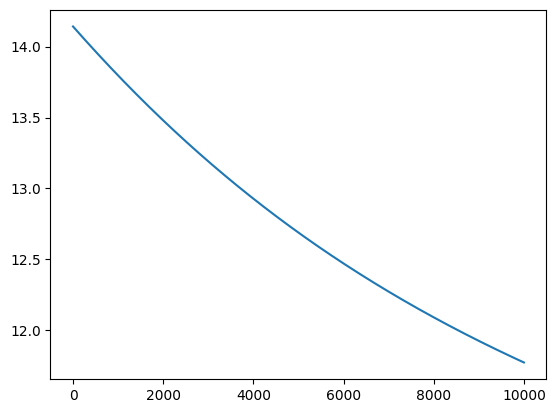

In [15]:
m = lr()
m.train(x_train, y_train, lr=0.0003, iter_limit=10000)
plt.plot(m.history)

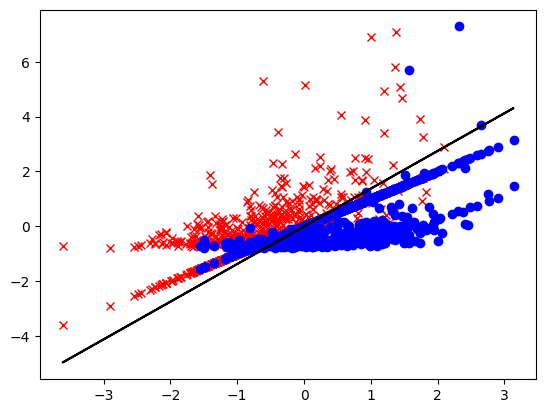

In [16]:
# plot train data
class0_x = x_train[y_train == 0]
class1_x = x_train[y_train == 1]
plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

# plot decision boundary
dec_boundary = -(m.bias + m.weights[0]*x_train[:,0]) / m.weights[1]
plt.plot(x_train[:,0], dec_boundary, "black")